# Module 1: Exercise A

In this project, we will focus on exploratory data analysis of body fat levels.

Let's first load all libraries or packages needed:

In [1]:
import pandas as pd
import numpy as np
import datetime
from sklearn.model_selection import train_test_split
import seaborn as sns
%matplotlib inline

## Read the Data

>__Task 1__
>
>- Import the data file "bodyfat_data.csv"
>- Check metadata using `info()`

In [2]:
bodyfat = pd.read_csv('bodyfat_data.csv')
print(bodyfat.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 281 entries, 0 to 280
Data columns (total 20 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       281 non-null    int64  
 1   Density  281 non-null    float64
 2   BodyFat  281 non-null    float64
 3   Age      275 non-null    float64
 4   Weight   281 non-null    float64
 5   Height   281 non-null    float64
 6   Neck     281 non-null    float64
 7   Chest    281 non-null    float64
 8   Abdomen  281 non-null    float64
 9   Hip      281 non-null    float64
 10  Thigh    281 non-null    float64
 11  Knee     281 non-null    float64
 12  Ankle    281 non-null    float64
 13  Biceps   281 non-null    float64
 14  Forearm  281 non-null    float64
 15  Wrist    281 non-null    float64
 16  Gender   281 non-null    object 
 17  Year     281 non-null    int64  
 18  Month    281 non-null    int64  
 19  Day      281 non-null    int64  
dtypes: float64(15), int64(4), object(1)
memory usage: 44.0

>__Task 2__
>
>Check the top 10 rows of the data frame

In [3]:
print(bodyfat.head(10))

   id  Density  BodyFat   Age  Weight  Height  Neck  Chest  Abdomen    Hip  \
0   0   1.0708     12.3  23.0  154.25   67.75  36.2   93.1     85.2   94.5   
1   1   1.0853      6.1  22.0  173.25   72.25  38.5   93.6     83.0   98.7   
2   2   1.0414     25.3  22.0  154.00   66.25  34.0   95.8     87.9   99.2   
3   3   1.0751     10.4  26.0  184.75   72.25  37.4  101.8     86.4  101.2   
4   4   1.0340     28.7  24.0  184.25   71.25  34.4   97.3    100.0  101.9   
5   5   1.0502     20.9  24.0  210.25   74.75  39.0  104.5     94.4  107.8   
6   6   1.0549     19.2  26.0  181.00   69.75  36.4  105.1     90.7  100.3   
7   7   1.0704     12.4  25.0  176.00   72.50  37.8   99.6     88.5   97.1   
8   8   1.0900      4.1  25.0  191.00   74.00  38.1  100.9     82.5   99.9   
9   9   1.0722     11.7  23.0  198.25   73.50  42.1   99.6     88.6  104.1   

   Thigh  Knee  Ankle  Biceps  Forearm  Wrist  Gender  Year  Month  Day  
0   59.0  37.3   21.9    32.0     27.4   17.1    Male  2013      3 

Do you know which columns contain date information? The first three columns (i.e., __Year__, __Month__, __Day__) are integers, shown as `int64` from the metadata above.

>__Task 3__
>
>- Combine and convert these three columns to a __date__ column, which contains `datetime` type
>- Confirm the result by printing its data type

In [4]:
bodyfat['date'] = pd.to_datetime(bodyfat[['Year', 'Month', 'Day']])
# Call the column to see results
print(bodyfat['date'].head(10))

0   2013-03-07
1   2013-04-16
2   2013-01-23
3   2013-02-09
4   2013-09-25
5   2012-02-17
6   2012-11-07
7   2012-07-17
8   2012-03-17
9   2013-08-26
Name: date, dtype: datetime64[ns]


In [5]:
# Print data type
print(bodyfat['date'].dtype)

datetime64[ns]


Now, let's look at the column __Gender__ and check the unique values and counts.

>__Task 4__
>
>Generate unique values and counts in __Gender__

In [6]:
print(bodyfat.Gender.value_counts())

Gender
Female    149
Male      129
Other       3
Name: count, dtype: int64


## Data Cleansing

What is the timeframe of data collection? We can print its minimum and maximum values:

In [7]:
print(bodyfat['date'].min(), bodyfat['date'].max())

2012-01-01 00:00:00 2013-12-26 00:00:00


Now, we want to find out if there's any missing values in the data.

>__Task 5__
>
>- Find the number of missing values in each column
>- Retrieve rows with missing values

In [8]:
# Find the number of missing values in columns
print(bodyfat.isnull().sum())


id         0
Density    0
BodyFat    0
Age        6
Weight     0
Height     0
Neck       0
Chest      0
Abdomen    0
Hip        0
Thigh      0
Knee       0
Ankle      0
Biceps     0
Forearm    0
Wrist      0
Gender     0
Year       0
Month      0
Day        0
date       0
dtype: int64


In [9]:
# Retrieve missing values in rows
print(bodyfat[bodyfat.isnull().any(axis=1)])

#6 rows have missing Age values

      id  Density  BodyFat  Age  Weight  Height  Neck  Chest  Abdomen    Hip  \
60    60   1.0396     26.1  NaN  216.00   73.25  41.4  112.3    104.8  103.1   
65    65   1.0313     30.0  NaN  183.50   67.50  40.9  103.0    100.3  104.2   
82    82   1.0568     18.4  NaN  190.25   72.75  39.3  103.1     97.8   99.6   
138  138   1.0481     22.4  NaN  168.25   71.25  34.3   98.3     88.5   98.3   
179  179   1.0603     16.9  NaN  234.75   74.50  42.8  109.5    104.5  109.9   
268   60   1.0396     26.1  NaN  216.00   73.25  41.4  112.3    104.8  103.1   

     ...  Knee  Ankle  Biceps  Forearm  Wrist  Gender  Year  Month  Day  \
60   ...  40.9   23.1    36.2     31.8   20.2  Female  2012      3   22   
65   ...  40.2   22.7    34.8     30.1   18.7  Female  2012      9    4   
82   ...  39.0   23.0    34.3     29.6   19.0    Male  2013      4   18   
138  ...  38.4   22.5    31.7     27.4   17.6  Female  2012      7   14   
179  ...  43.1   25.8    39.1     32.5   19.9    Male  2013     

Looks like some records have missing age info.

>__Task 6__
>
>Handle missing values (What is your suggestion?)

In [10]:
#Drop rows with missing Age values
bodyfat = bodyfat.dropna(subset=['Age'])

In [11]:
# Retrieve missing values in rows again to double check the result
print(bodyfat[bodyfat.isnull().any(axis=1)])
# No zero rows with missing values

Empty DataFrame
Columns: [id, Density, BodyFat, Age, Weight, Height, Neck, Chest, Abdomen, Hip, Thigh, Knee, Ankle, Biceps, Forearm, Wrist, Gender, Year, Month, Day, date]
Index: []

[0 rows x 21 columns]


Also, we want to find out if there's any duplicated values. Note that this data set has an __id__ column. So, we can rely on this column, but be cautious to check the duplicated rows.

>__Task 7__
>
>Check if there is any duplicates in the data set and identify if further action is needed

In [12]:
duplicates = bodyfat.duplicated()
print(duplicates.any())
#Remove duplicates
bodyfat = bodyfat.drop_duplicates()
# Check again for duplicates
duplicates = bodyfat.duplicated()
print(duplicates.any())


True
False


## Data Analysis and Preprocessing

Let's explore the data more. We will dive into a few attributes.

>__Task 8__
>
>- Check the min, max, and average values of the __Age__ column
>- Find out how many data points are in each __Gender__ group

In [13]:
# Check values
print(bodyfat.Age.max())
print(bodyfat.Age.min())
print(bodyfat.Age.mean())

81.0
22.0
44.74089068825911


In [14]:
# Count data points
print(bodyfat.Gender.value_counts())

Gender
Female    130
Male      114
Other       3
Name: count, dtype: int64


>__Task 9__
>
>- The __Gender__ column has a categorical variable. Is it ordinal or nominal?
>- Convert it to numerical data and add prefix `Gender` to the new columns

In [15]:
# Count values
#Nominal, no order to gender

This is an nominal variable. The suitable method is one-hot encoding method. One-hot encoding may also be applicable to some machine learning algorithms.

In [16]:
# Convert values
bodyfat['Gender_Male'] = (bodyfat['Gender'] == 'Male').astype(int)
bodyfat['Gender_Female'] = (bodyfat['Gender'] == 'Female').astype(int)
bodyfat['Gender_Other'] = (bodyfat['Gender'] == 'Other').astype(int)

print(bodyfat.Gender_Female.sum())
print(bodyfat.Gender_Male.sum())
print(bodyfat.Gender_Other.sum())

bodyfat = bodyfat.drop('Gender', axis=1)
#Same counts as before

130
114
3


>__Task 10__
>
>- Check the min and max values of __Height__
>- Identify the rows with min and max values of the column

In [17]:
print(bodyfat.Height.min())
print(bodyfat.Height.max())

29.5
77.75


In [18]:
# Identify the rows with min value
print(bodyfat[bodyfat.Height == bodyfat.Height.min()])

    id  Density  BodyFat   Age  Weight  Height  Neck  Chest  Abdomen    Hip  \
41  41    1.025     32.9  44.0   205.0    29.5  36.6  106.0    104.3  115.5   

    ...  Biceps  Forearm  Wrist  Year  Month  Day       date  Gender_Male  \
41  ...    33.6     28.7   17.4  2013     10   20 2013-10-20            1   

    Gender_Female Gender_Other  
41              0            0  

[1 rows x 23 columns]


In [19]:
# Identify the rows with max value
print(bodyfat[bodyfat.Height == bodyfat.Height.max()])

    id  Density  BodyFat   Age  Weight  Height  Neck  Chest  Abdomen    Hip  \
95  95   1.0991     17.4  53.0   224.5   77.75  41.1  113.2     99.2  107.5   

    ...  Biceps  Forearm  Wrist  Year  Month  Day       date  Gender_Male  \
95  ...    32.9     30.8   20.4  2012      1   20 2012-01-20            0   

    Gender_Female Gender_Other  
95              0            1  

[1 rows x 23 columns]


Next, we want to find if there's any outliers using the rule `mean+-3*sd` and common sense.

>__Task 11__
>
>Retrieve rows where values are outliers in the __weight__ column
>
>- Find the the max, mean, and min of the column
>- Create a mask for values less than `mean-3*sd` and greater than `mean+3*sd`
>- Use the mask to filter the rows. Do you recommend to replace the outliers?

In [20]:
# Find the min, max, mean 
print(bodyfat.Height.max())
print(bodyfat.Height.min())
print(bodyfat.Height.mean())

77.75
29.5
70.11437246963563


In [21]:
# Create a mask and filter the rows
mean = bodyfat.Height.mean()
std_dev = bodyfat.Height.std()
mask = bodyfat.Height.between(mean-3*std_dev, mean+3*std_dev)
filtered = bodyfat[mask]
print(len(bodyfat), len(filtered))

247 246


As the dataset contains body measure, it is expected to see some outliers in terms of weight or other indicators. Unless the number exceeds the possibility of the human body weight, no need to drop or replace the outliers.

>__Task 12__
>
>Retrieve rows where values are outliers in the __BodyFat__ column
>
>- Find the the max, mean, and min of the column. What do you find? Any outliers or values that seems unusual?
>- What do you recommend to handle the outlier(s)? Execute your recommendation.

In [22]:
# Find the min, max, mean of the BodyFat column
print(bodyfat.BodyFat.max())
print(bodyfat.BodyFat.min())
print(bodyfat.BodyFat.mean())

47.5
0.0
19.077732793522262


In [23]:
#Looks like zero values are not valid
#We can also set a specific threshold for a valid BodyFat value using context knowledge

threshold = 0
# Create a mask and filter the rows
mask = bodyfat.BodyFat > threshold
filtered = bodyfat[mask]
print(len(bodyfat), len(filtered))
print(filtered.BodyFat.max())
print(filtered.BodyFat.min())
print(filtered.BodyFat.mean())


247 246
47.5
0.7
19.155284552845526


In [24]:
bodyfat.columns

Index(['id', 'Density', 'BodyFat', 'Age', 'Weight', 'Height', 'Neck', 'Chest',
       'Abdomen', 'Hip', 'Thigh', 'Knee', 'Ankle', 'Biceps', 'Forearm',
       'Wrist', 'Year', 'Month', 'Day', 'date', 'Gender_Male', 'Gender_Female',
       'Gender_Other'],
      dtype='object')

>__Task 13__
>
>Split the data set into 80% train set and 20% test set. Use `random_state=123` for replication purpose
>
>- The target variable is __BodyFat__
>- The feature columns are __Density__, __Age__, __Weight__, __Height__, __Neck__, __Chest__, __Abdomen__, __Hip__, __Thigh__, __Knee__, __Ankle__, __Biceps__, __Forearm__, __Wrist__, and two gender columns that you have converted.

In [25]:
features = [
    'Density', 'Age', 'Weight', 'Height', 'Neck', 'Chest', 'Abdomen','Hip', 'Thigh', 'Knee', 'Ankle', 'Biceps', 'Forearm', 'Wrist', 'Gender_Male', 'Gender_Female', 'Gender_Other']
target = 'BodyFat'
X_train, X_test, y_train, y_test = train_test_split(bodyfat[features], bodyfat[target], train_size=0.8, random_state=123
)

>__Task 14__
>
>- Fit `MinMaxScaler` to scale all `X` columns between 0 and 1. Do you need to scale the encoded categorical variables?
>- Implement the scaler to both train and test sets from the above task, and save to `X_train_scaled` and `X_test_scaled`

In [26]:
#No need to scale encoded categorical variables since they are already in 0-1 range

In [27]:
# Transform both train and test sets
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[features])
X_test_scaled = scaler.transform(X_test[features])

## Visualization

Let's first use pandas default histogram method to plot distributions.

>__Task 15__
>
>Plot distributions for __Weight__ and __Height__ separately, setting transparency to 50%

<Axes: title={'center': 'Weight Distribution'}, ylabel='Frequency'>

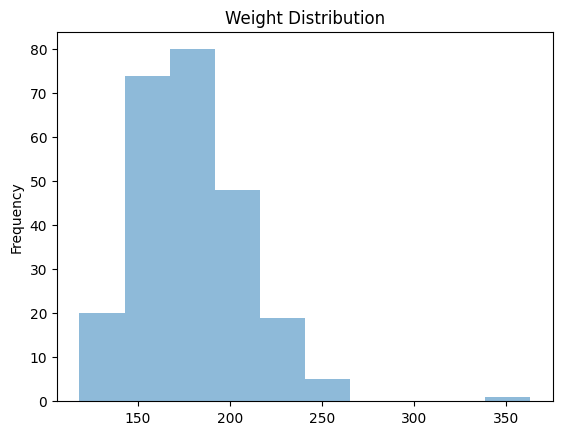

In [28]:
# Plot for Weight
bodyfat.Weight.plot.hist(alpha=0.5, title='Weight Distribution')

<Axes: title={'center': 'Height Distribution'}, ylabel='Frequency'>

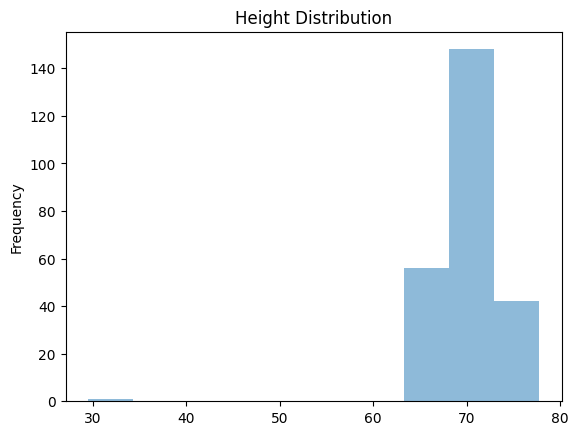

In [29]:
# Plot for Height
bodyfat.Height.plot.hist(alpha=0.5, title='Height Distribution')

Then, we use seaborn pairplot method to compare different attributes. Do you think any features are highly related?  

>__Task 16__
>
>Create a pairplot using seaborn to compare the following features:
>
>__BodyFat__, __Age__, __Weight__, __Height__, __Neck__, __Chest__, __Abdomen__, __Hip__, __Thigh__

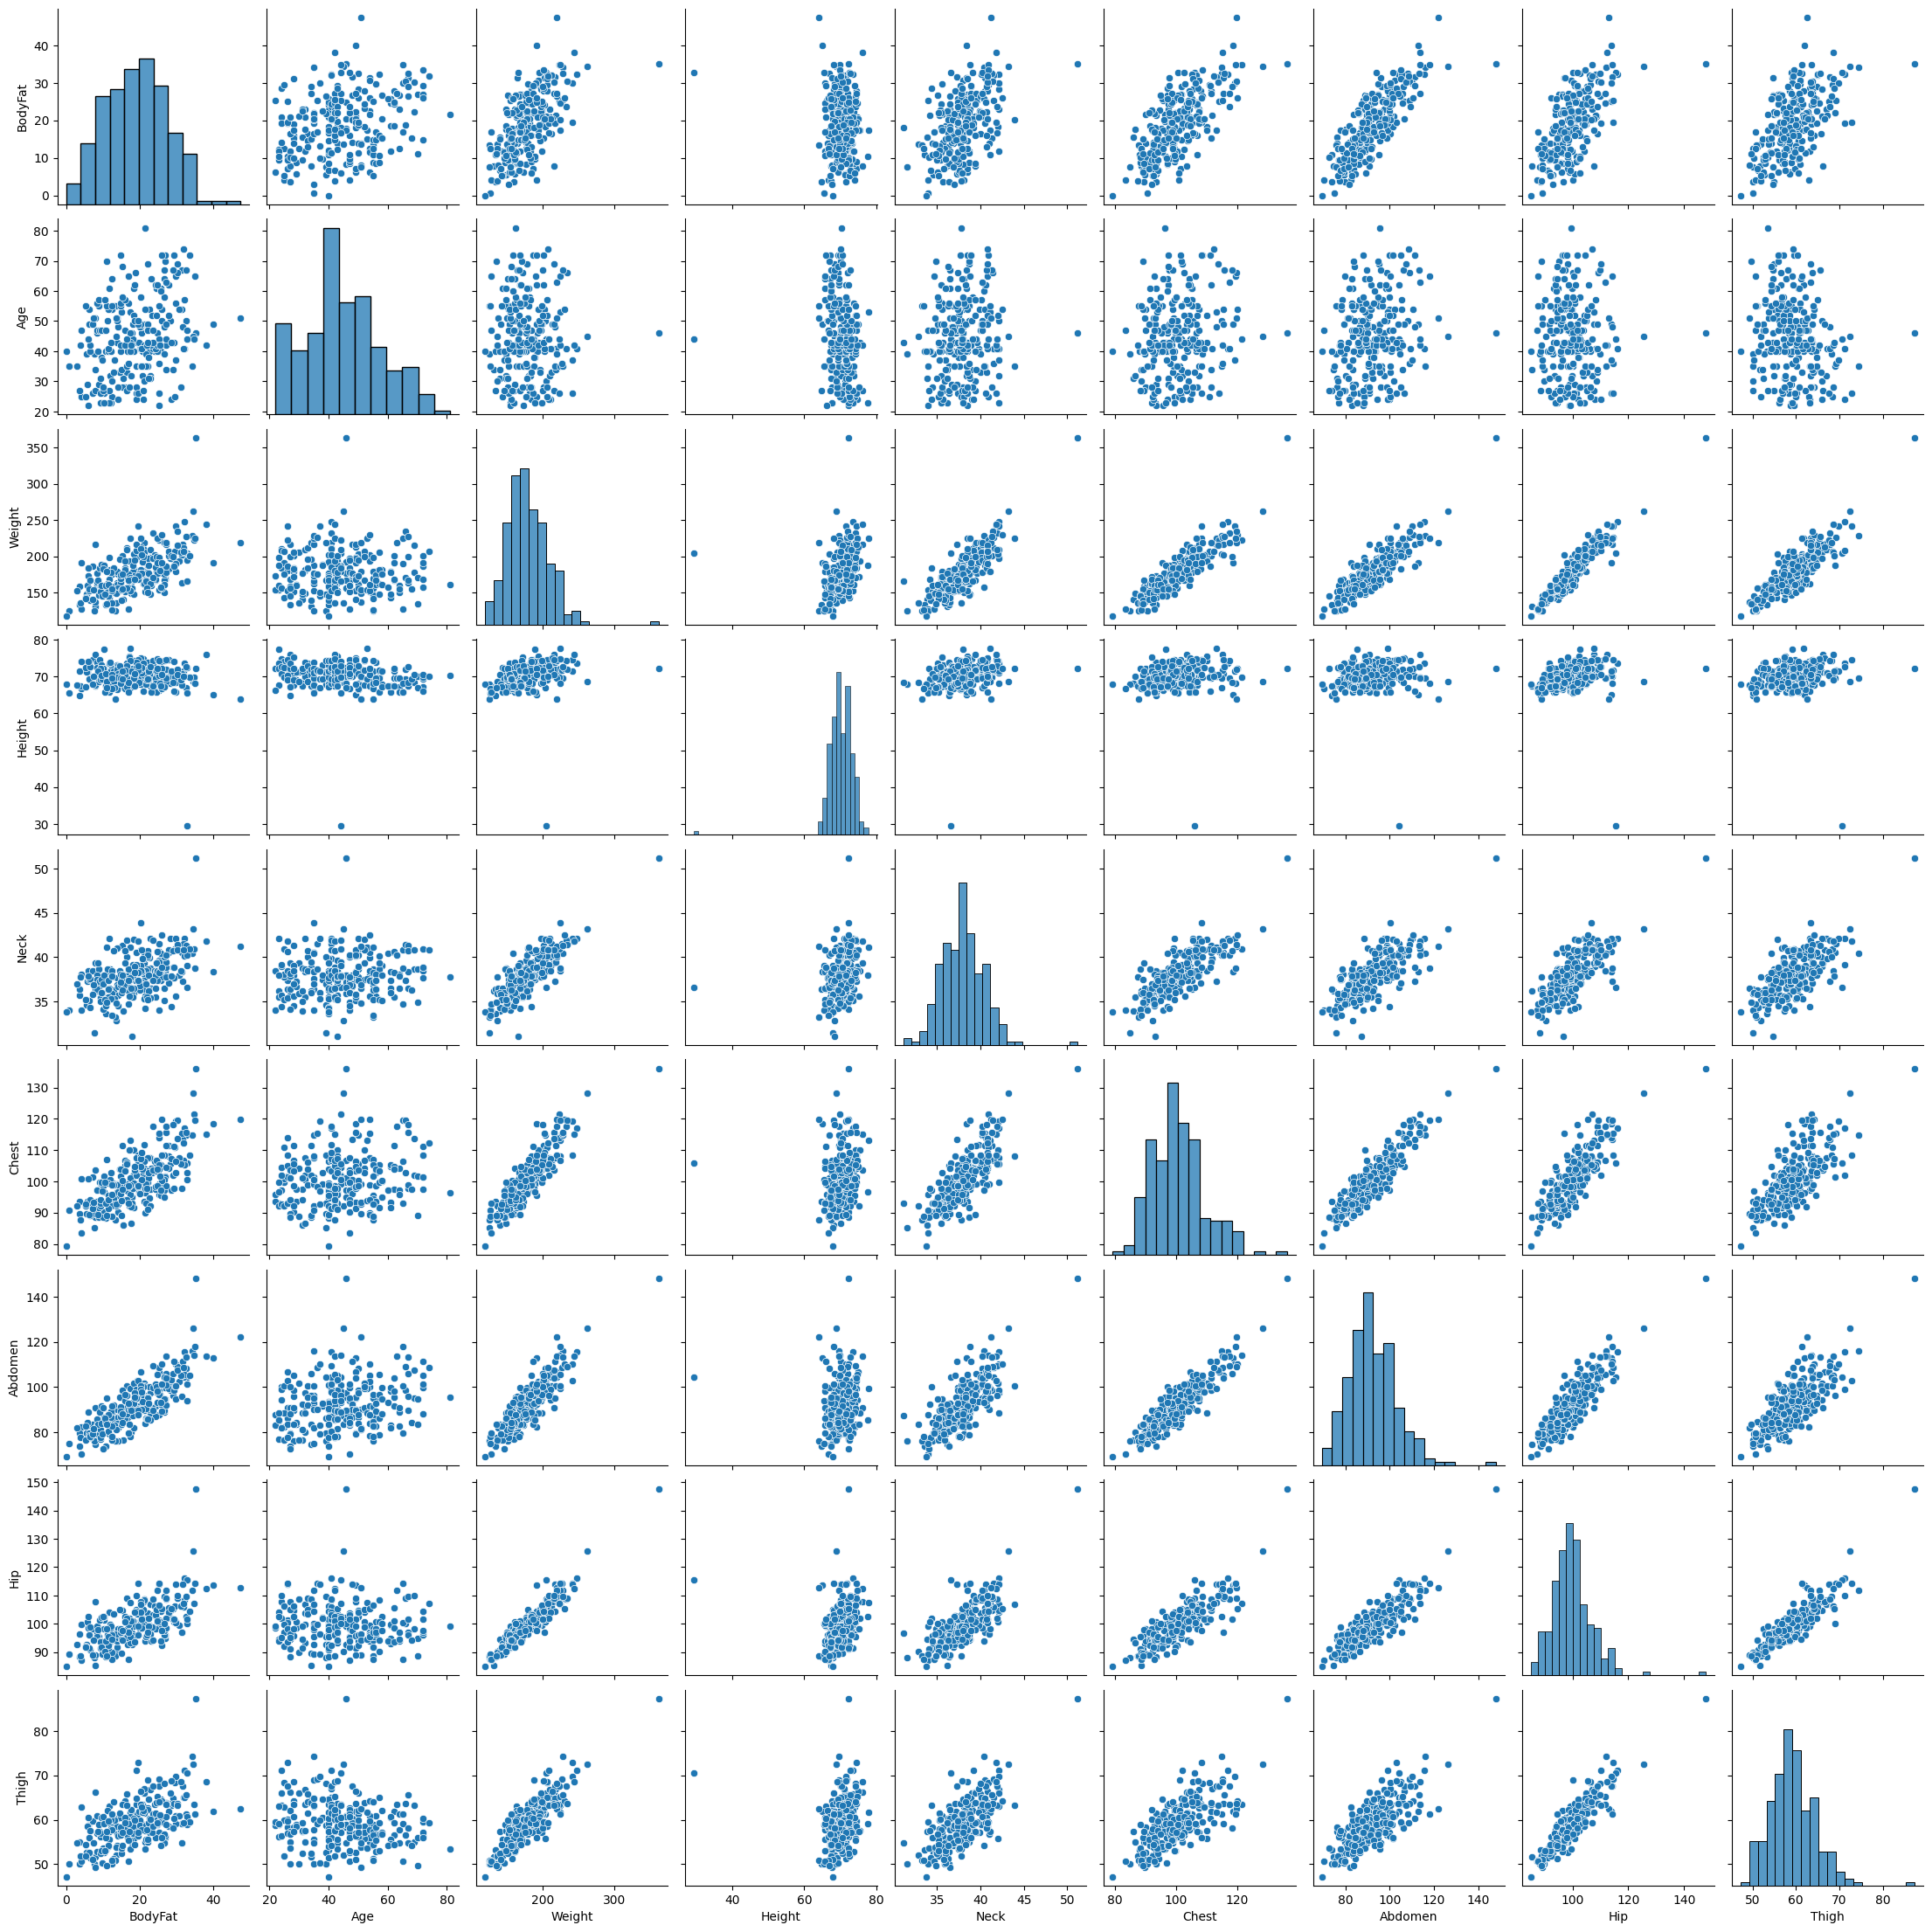

In [30]:
features = ['BodyFat', 'Age', 'Weight', 'Height','Neck', 'Chest', 'Abdomen', 'Hip', 'Thigh']
sns.pairplot(bodyfat[features])

There are a few columns that seem to have positive relationships with the target variable __BodyFat__. Let's check whether any of the features has visible correlation with the target variable.

>__Task 17__
>
>Using pandas built-in function, create a single scatter plot to show the join distribution of __BodyFat__ and __Weight__

<Axes: title={'center': 'BodyFat vs Weight'}, xlabel='Weight', ylabel='BodyFat'>

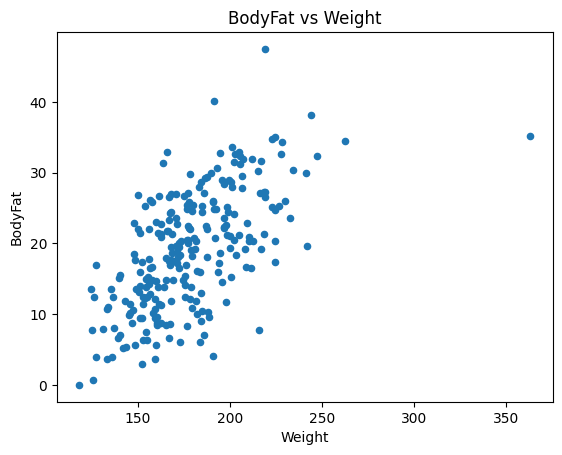

In [31]:
bodyfat.plot.scatter(x='Weight', y='BodyFat', title='BodyFat vs Weight')

>__Task 18__
>
>Create a heatmap of correlation between the features in `X_train`
>
>- Get the correlation matrix of all the columns in `X_train` using `.corr()` method
>- Plot a heatmap of the correlation matrix using `seaborn.heatmap` module
>     - Set colormap to `coolwarm`
>     - Set formatting string to `.2f`

<Axes: >

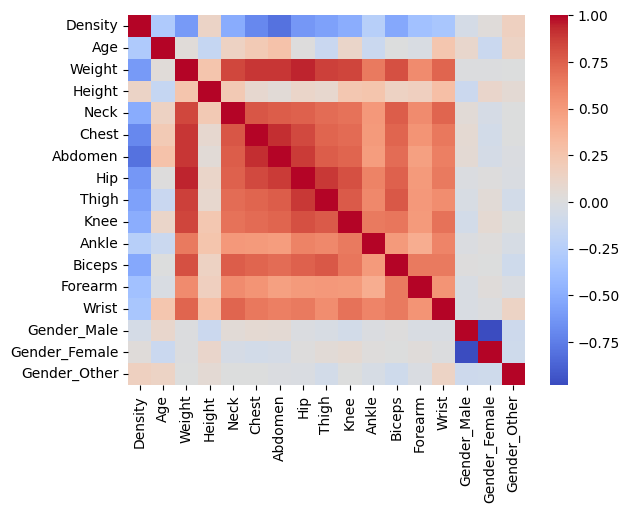

In [32]:
matrix = X_train.corr()
sns.heatmap(matrix, cmap='coolwarm', fmt='.2f')

Looks like the body parts measurements are positively correlated, and density is negatively correlated with body measures.